## 神经网络（Neural Network）
- 一种模拟人脑神经元结构和功能的计算模型。它由大量的人工神经元（节点）组成，这些节点通过连接（权重）相互作用。神经网络可以用于处理复杂的模式识别、分类和回归问题。

神经网络的基本结构包括输入层、隐藏层和输出层：
1. **输入层**：接收输入数据，每个节点代表一个输入特征。
2. **隐藏层**：位于输入层和输出层之间，可以有一个或多个隐藏层。每个隐藏层节点接收前一层的输出，并通过激活函数进行非线性变换。
3. **输出层**：生成最终的输出结果，每个节点代表一个输出。

神经网络的训练过程包括以下步骤：
1. **前向传播**：输入数据通过网络层层传递，生成预测输出。
2. **损失计算**：计算预测输出与真实值之间的误差（损失）。
3. **反向传播**：根据损失调整网络的权重，以减少误差。反向传播算法使用梯度下降法来更新权重。


### 神经网络前向传播（Forward Propagation）

前向传播是神经网络中数据从输入层传递到输出层的过程。它是神经网络进行预测的关键步骤。以下是前向传播的详细步骤：

1. **输入数据**：将输入数据提供给输入层的每个节点。
2. **加权求和**：每个隐藏层节点接收输入层节点的输出，并根据连接权重进行加权求和。
3. **激活函数**：将加权求和的结果输入到激活函数中，进行非线性变换。常用的激活函数包括Sigmoid、ReLU和Tanh等。
4. **输出层计算**：隐藏层的输出作为输入传递给输出层节点，进行类似的加权求和和激活函数变换，最终生成预测结果。

前向传播的公式如下：
- 对于隐藏层的每个节点 $ h_j $：
    $$ h_j = f\left(\sum_{i=1}^{n} w_{ij} \cdot x_i + b_j\right) $$
    其中，$  x_i $  是输入数据，$  w_{ij} $  是权重，$  b_j $  是偏置，$  f $  是激活函数。

- 对于输出层的每个节点 $  y_k $ ：
    $$ 
    y_k = f\left(\sum_{j=1}^{m} w_{jk} \cdot h_j + b_k\right)
    $$ 
    其中，$  h_j $  是隐藏层的输出，$  w_{jk} $  是权重，$  b_k $  是偏置，$  f $  是激活函数。

通过前向传播，神经网络可以将输入数据转换为输出结果，用于分类、回归等任务。

### 神经网络反向传播（Backpropagation）

反向传播是神经网络训练过程中用于调整权重和偏置的关键算法。它通过计算损失函数相对于每个权重和偏置的梯度，来最小化预测误差。以下是反向传播的详细步骤：

1. **损失计算**：首先，通过前向传播计算神经网络的预测输出，并与真实值进行比较，计算损失函数（例如均方误差或交叉熵损失）。

2. **损失函数的梯度**：计算损失函数相对于输出层每个节点的梯度。对于输出层的每个节点 $ y_k $，梯度计算公式为：
    $$
    \frac{\partial L}{\partial y_k} = y_k - t_k
    $$
    其中，$ L $ 是损失函数，$ y_k $ 是预测输出，$ t_k $ 是真实值。

3. **输出层到隐藏层的梯度**：计算输出层节点相对于隐藏层节点的梯度。对于隐藏层的每个节点 $ h_j $，梯度计算公式为：
    $$
    \frac{\partial L}{\partial h_j} = \sum_{k=1}^{m} \frac{\partial L}{\partial y_k} \cdot w_{jk}
    $$
    其中，$ w_{jk} $ 是隐藏层到输出层的权重。

4. **隐藏层到输入层的梯度**：计算隐藏层节点相对于输入层节点的梯度。对于输入层的每个节点 $ x_i $，梯度计算公式为：
    $$
    \frac{\partial L}{\partial x_i} = \sum_{j=1}^{n} \frac{\partial L}{\partial h_j} \cdot w_{ij}
    $$
    其中，$ w_{ij} $ 是输入层到隐藏层的权重。

5. **权重和偏置更新**：使用梯度下降法更新权重和偏置。更新公式为：
    $$
    w_{ij} = w_{ij} - \eta \cdot \frac{\partial L}{\partial w_{ij}}
    $$
    $$
    b_j = b_j - \eta \cdot \frac{\partial L}{\partial b_j}
    $$
    其中，$ \eta $ 是学习率，$ \frac{\partial L}{\partial w_{ij}} $ 和 $ \frac{\partial L}{\partial b_j} $ 分别是损失函数相对于权重和偏置的梯度。

通过反向传播，神经网络可以不断调整权重和偏置，从而逐步减少预测误差，提高模型的准确性。

In [19]:
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def sigmoid(x):
    # sigmoid 函数
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    # sigmoid 函数求导
    return sigmoid(x) * (1 - sigmoid(x))

# 示例样本
X = np.array([[1, 1]])
y = np.array([[1]])

X, y

(array([[1, 1]]), array([[1]]))

In [24]:
# 示例神经网络完整实现
class NeuralNetwork:
    # 初始化参数
    def __init__(self, X, y, lr):
        self.input_layer = X
        self.W1 = np.random.rand(self.input_layer.shape[1], 3)
        self.W2 = np.random.rand(3, 1)
        self.y = y
        self.lr = lr
        self.output_layer = np.zeros(self.y.shape)

    # 前向传播
    def forward(self):
        self.hidden_layer = sigmoid(np.dot(self.input_layer, self.W1))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.W2))

    # 反向传播
    def backward(self):
        d_W2 = np.dot(self.hidden_layer.T,
            (2 * (self.output_layer - self.y) * sigmoid_derivative(np.dot(self.hidden_layer, self.W2))),)

        d_W1 = np.dot(self.input_layer.T, (
                np.dot(2 * (self.output_layer - self.y) * sigmoid_derivative(np.dot(self.hidden_layer, self.W2)),
                    self.W2.T,) * sigmoid_derivative(np.dot(self.input_layer, self.W1))),)

        # 参数更新
        self.W1 -= self.lr * d_W1
        self.W2 -= self.lr * d_W2

,X0,X1,Y
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


final loss: 133.58999755519702


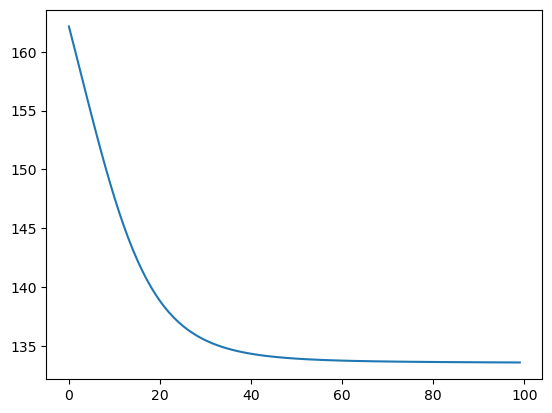

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

df = pd.read_csv("course-12-data.csv", header=0)  # 加载数据集

display(df.head())  # 显示数据集前 5 行

X = df[["X0", "X1"]].values  # 输入值
y = df[["Y"]].values  # 真实 y

nn = NeuralNetwork(X, y, lr=0.001)  # 定义模型
loss_list = []  # 存放损失数值变化

for i in range(100):
    nn.forward()  # 前向传播
    nn.backward()  # 反向传播
    loss = np.sum((y - nn.output_layer) ** 2)  # 计算平方损失
    loss_list.append(loss)

print("final loss:", loss)
plt.plot(loss_list)  # 绘制 loss 曲线变化图